Author: Lijing Wang, lijing52@stanford.edu; David Zhen Yin, yinzhen@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)

In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A.git

Cloning into 'GEOLSCI6_EARTHSYS100A'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 221 (delta 5), reused 9 (delta 2), pack-reused 203
Receiving objects: 100% (221/221), 22.70 MiB | 19.02 MiB/s, done.
Resolving deltas: 100% (91/91), done.


# Volcano dataset
Here we present a dataset: Volcanic Eruptions of the World after 1 BC. Eruption larger than M3.8 is listed here. Magnitude of volcanos, also called Volcano Explosivity index ([VEI](https://en.wikipedia.org/wiki/Volcanic_Explosivity_Index)), quantifies how much volcanic material is thrown out, to what height, and how long the eruption lasts. 

Let's load this dataset and plot Eruption Magnitude vs time scale. 



In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load volcano dataset 
## Reference literature: Recurrence rates of large explosive volcanic eruptions, https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2009JB006554 
volcano_data = pd.read_csv('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond/volcano_data.txt',
                           sep="\t", header=None, index_col = False,
                           skiprows=7, names = ['M', 'Year.MonthDay', 'Volcano location'])

## Extract volcano eruption year
volcano_data['Year'] =  np.array(volcano_data['Year.MonthDay'].str.split(pat = '.', expand = True).values[:,0],dtype = 'int64')

In [ ]:
volcano_data

,M,Year.MonthDay,Volcano location,Year
0,5.4,1991.0812,Hudson (Chile-S),1991
1,5.8,1991.0615,"Pinatubo, Mt. (Luzon)",1991
2,4.3,1990.1114,Unzen,1990
3,3.8,1990.0210,Kelut (Java),1990
4,3.8,1986.1118,Chikurachki-Tatatinov,1986
...,...,...,...,...
275,5.8,79.0824,Vesuvius (Italy),79
276,6.2,65,Bona-Churchill (Alaska),65
277,5.1,50,Tolbachik,50
278,4.6,000,Aso,0


Text(0.5, 0, 'Number of occurence')

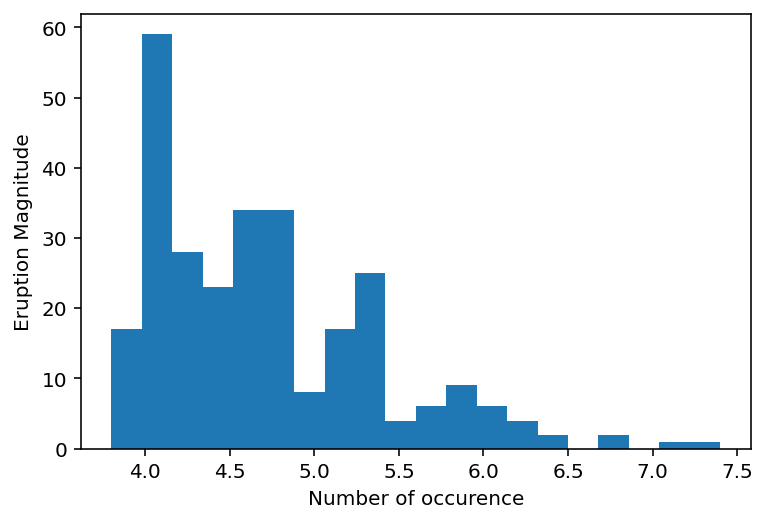

In [ ]:
## Long tail distribution
plt.hist(volcano_data['M'],bins = 20)
plt.ylabel('Eruption Magnitude')
plt.xlabel('Number of occurence')

Text(0, 0.5, 'Eruption Magnitude')

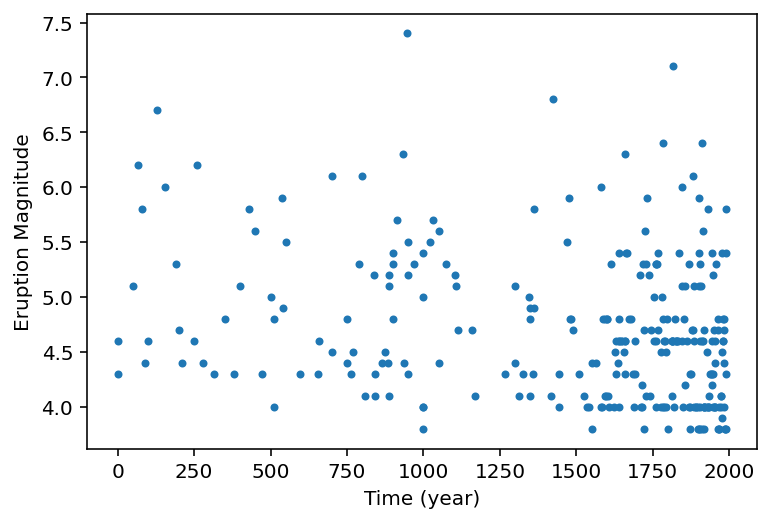

In [ ]:
plt.plot(volcano_data['Year'], volcano_data['M'],'.')
plt.xlabel('Time (year)')
plt.ylabel('Eruption Magnitude')

In [ ]:
volcano_data = volcano_data[volcano_data['Year']>1750]

Above we show all documented volcano eruptions within 2000 years, a long tail, skewed distribution. We notice that there must be underreporting for the early years. Fewer volcanos are documented before 1750. Also, larger eruptions have less possibility being missed than smaller eruptions. 

In this notebook, we will investigate recurrence rates of large explosive volcanic eruptions, using volcano eruptions after 1750. Then there is not much underreporting. For results including underreporting, please refer to https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2009JB006554 

Text(0, 0.5, 'Eruption Magnitude')

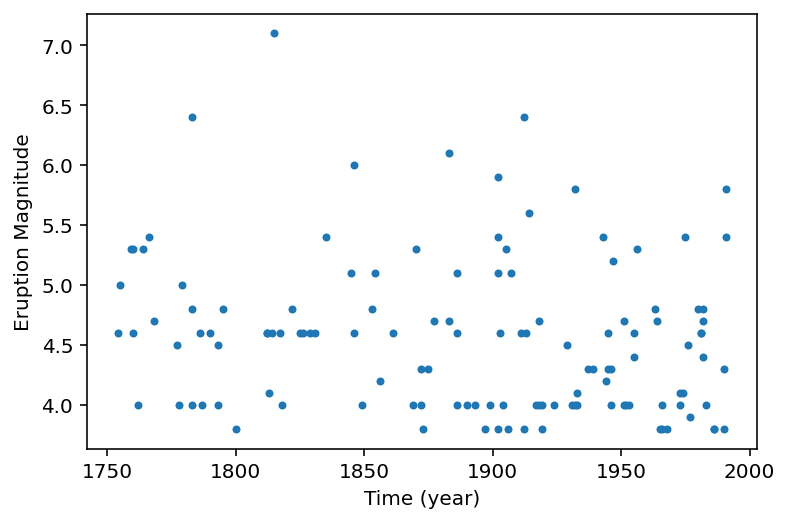

In [ ]:
plt.plot(volcano_data['Year'], volcano_data['M'],'.')
plt.xlabel('Time (year)')
plt.ylabel('Eruption Magnitude')

# Return period and return level plot

 


## Definition: Return Value $X$ of Return Period $T$
 
*   Example: we experience one magnitude 8 or stronger earthquake on average every 10 years.

From the above statement, magnitude 8 is the Return Value $X$, and 10 years is the Return Period $T$. We can also say: 

*  A magnitude 8 or stronger earthquake happens within a year with a probability of 10%, is the reciprocal of Return Period $T$. 

We can then propose different Return Value $X$, estimate their Return Period $T$ and make the return period v.s. return level plot. 

To estimate the return period, the simplest way is to calculate from historical data. For example, if we observe > M8 earthquake 10 times in the past 100 years, we could say the estimated return period is 10 years. However, if the return value is now very extreme, M10, we have no record in the history. 

So how to estimate the correponding return period then? That requires extreme value theory we learnt and extrapolate the return period and return level plot.

## Empirical return period and return level data

Let's go back to our volcano dataset. How many eruptions > M5 happens between 1750 - 2000? 

In [ ]:
np.sum(volcano_data['M']>=5)

29

We then estimate our return period T for return value M5 volcanos: $T = (2000-1750)/29 \approx 8.62 $ years. 

Or the possibility of M5 volcano erupting with in a year is $P(X>=5) = 29/(2000-1750) = 11.6\% $

We can use the same idea to plot empirical return period v.s. return level plot. 

In [ ]:
## calculate empirical return period
empirical_VEI = np.unique(np.sort(volcano_data['M']))
empirical_return_period = np.zeros(len(empirical_VEI))
for i, vei in enumerate(empirical_VEI):
    empirical_return_period[i] = (2000-1750)/np.sum(volcano_data['M']>=vei)

(3.0, 9.0)

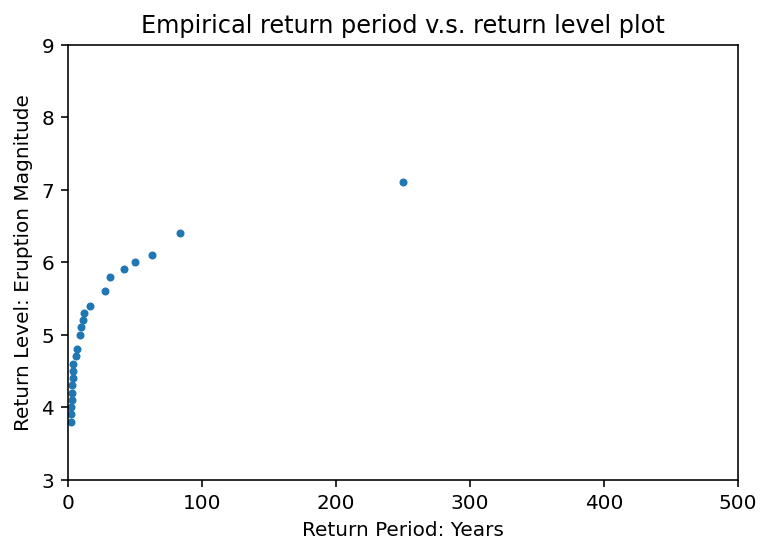

In [ ]:
## Empirical return period v.s. return level plot
plt.plot(empirical_return_period,empirical_VEI,'.')
plt.xlabel('Return Period: Years')
plt.ylabel('Return Level: Eruption Magnitude')
plt.title('Empirical return period v.s. return level plot')
plt.xlim([0, 500])
plt.ylim([3, 9])

(4.0, 9.0)

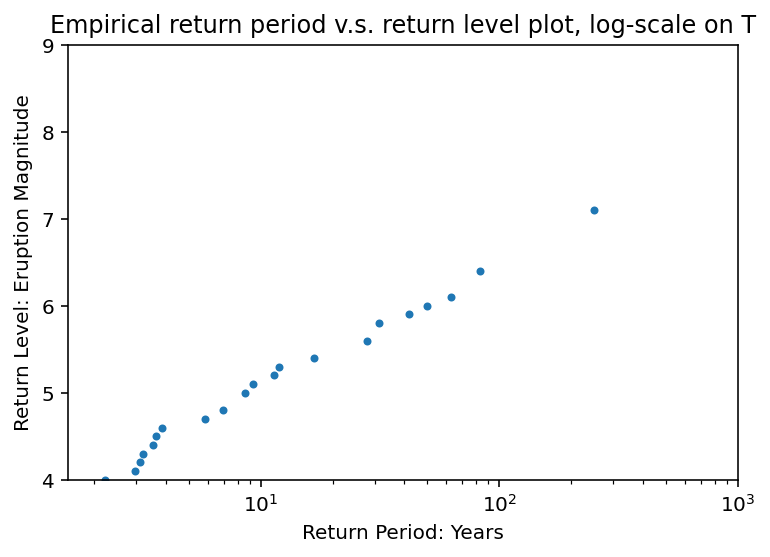

In [ ]:
## Empirical return period v.s. return level plot, log-scale on T
plt.plot(empirical_return_period,empirical_VEI,'.')
plt.xscale('log',basex = 10)
plt.xlabel('Return Period: Years')
plt.ylabel('Return Level: Eruption Magnitude')
plt.title('Empirical return period v.s. return level plot, log-scale on T')
plt.xlim([0, 1000])
plt.ylim([4, 9])

So surprisingly, **return level $X$ and return period $T$ seem to have a linear relationship after we take logarithm of $T$**, especially for the tail part. That's supported by the extreme value theory we learned before. Let's dive into some derivation. 



## Extreme value theory on return level and return period: using POT

Recall two methods we introduced in our last notebook: 1. Block Maxima 2. Peaks Over Threshold: 

*   Block Maxima is targeting on maxima distribution, easy to implement with blocking, but not in favor of a smaller sample size. 

*   Peaks Over Threshold is targeting on the distribution of exceedances over threshold. Therefore, we can use more samples than in Block Maxima. However, picking threshold can be tough: it is a trade-off between bias and variance. 

Here for a smaller sample size of our volcano dataset (~100), we will use Peaks Over Threshold method:


1.   Select a threshold $u$
2.   Extract the exceedances from the dataset, find all data larger than $u$
3.   Fit Generalized Pareto Distribution to the exceedances:
     Exceedances of the dataset is a Generalized Pareto Distribution. 
     $$GPD(y) = P(X\leq u+y|X>u) = 1- P(X>u+y|X>u)$$
4.   Then for any return value $x$, if we denote $x = u+y$:
$$P(X>x) = P(X>u+y)  = P(X>u+y|X>u)P(X>u) = (1-GPD(y))P(X>u)$$
$P(X>u)$ can be estimated empirically. 
Then the return period $T(x)$ is:
$$T(x) = \frac{1}{P(X>x)} = \frac{1}{(1-GPD(x-u))P(X>u)}$$
where $x>u$.

The simplest GPD is when $\xi= 0$, which is an exponential distribution: 
$$GPD(x) = 1-\exp\left(-\frac{(x-\mu)}{\sigma}\right)$$

In this simple case: 
$$P(X>x) = (1-GPD(y))P(X>u) = P(X>u)\exp\left(-\frac{(x-u-\mu)}{\sigma}\right)$$
Therefore, if we replace $P(X>x)$ with $T(x)$ and take a logarithm: 
$$x = \sigma\log(T(x)P(x>u))+\mu+u $$

where we have a linear relationship between return level $X$ and logarithm of the return period $T(x)$

Let's follow these above procedures and see what are the return periods for huge eruptions. 


## Fitting GPD and learning return periods for extreme volcano eruptions
1.   Select a threshold $u$: here we select $u = M4.7$, based on our empirical return period v.s. return level plot



In [ ]:
## threshold
u = 4.7

2.   Extract the exceedances from the dataset, find all data larger than $u$

Text(0, 0.5, 'Probability density')

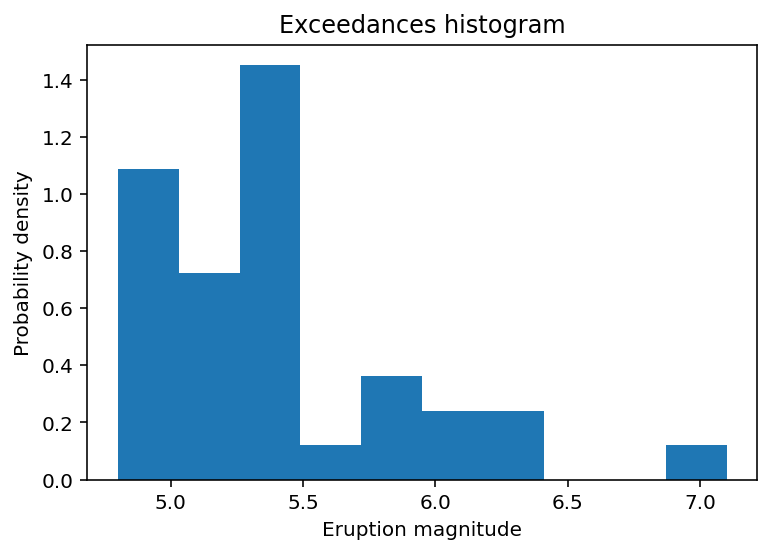

In [ ]:
plt.hist(volcano_data['M'][volcano_data['M']>u], density  = True)
plt.title('Exceedances histogram')
plt.xlabel('Eruption magnitude')
plt.ylabel('Probability density')

These exceedances look like following the GPD distribution, skewed, long-tail. 

3.   Fit Generalized Pareto Distribution to the exceedances

Let's fit the GPD to the exceedances minus $u$, and estimate $\xi, \mu, \sigma$:

In [ ]:
from scipy.stats import genpareto
xi, mu, sigma =genpareto.fit(volcano_data['M'][volcano_data['M']>u]-u)

In [ ]:
print('xi: '+str(xi))

xi: -0.13944327973122062


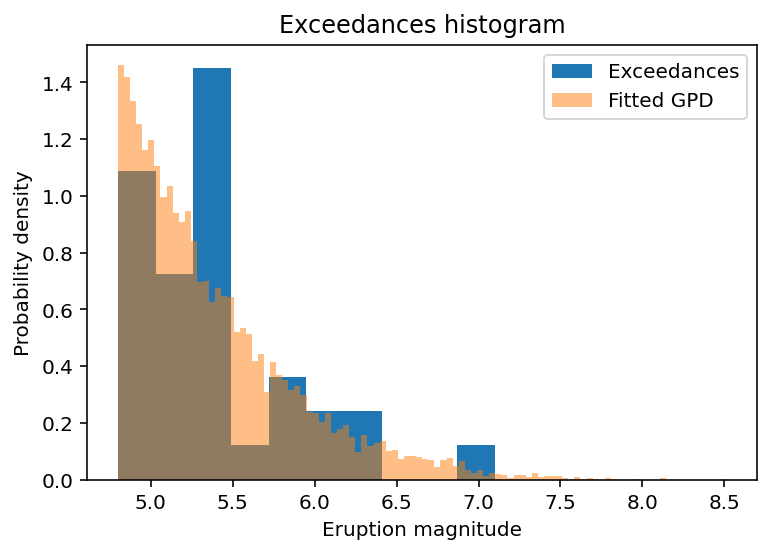

In [ ]:
plt.hist(volcano_data['M'][volcano_data['M']>u], density  = True, label = 'Exceedances')
plt.hist(genpareto.rvs(xi, mu, sigma, size = 10000)+u, bins = 100, density  = True,alpha = 0.5,label = 'Fitted GPD')
plt.title('Exceedances histogram')
plt.xlabel('Eruption magnitude')
plt.ylabel('Probability density')
plt.legend()

Here fitted $\xi$ < 0. We have the limited upper bound of volcano eruption magnitude. 

4.  Plot a fitted return level, return period curve

In [ ]:
def return_period_function(return_level_x, u, xi, mu, sigma, data, time_interval = 250):
    ## 1−𝐺𝑃𝐷(𝑦),y = x - u
    one_minus_GPD_y = 1-genpareto.cdf(return_level_x-u,xi,mu,sigma)

    ## Pu = 𝑃(𝑋>𝑢)
    Pu = np.sum(data>u)/time_interval

    ## P(X>x)
    exceedance_prob = one_minus_GPD_y*Pu

    ## T = 1/P(X>x)
    return_period_T = 1/exceedance_prob

    return return_level_x, return_period_T

In [ ]:
return_level_x, return_period_T = return_period_function(np.arange(4.8,9,0.1), u, xi, mu, sigma, volcano_data['M'], time_interval = 250)

Text(0.5, 1.0, 'Fitted return period v.s. return level plot, log-scale on T')

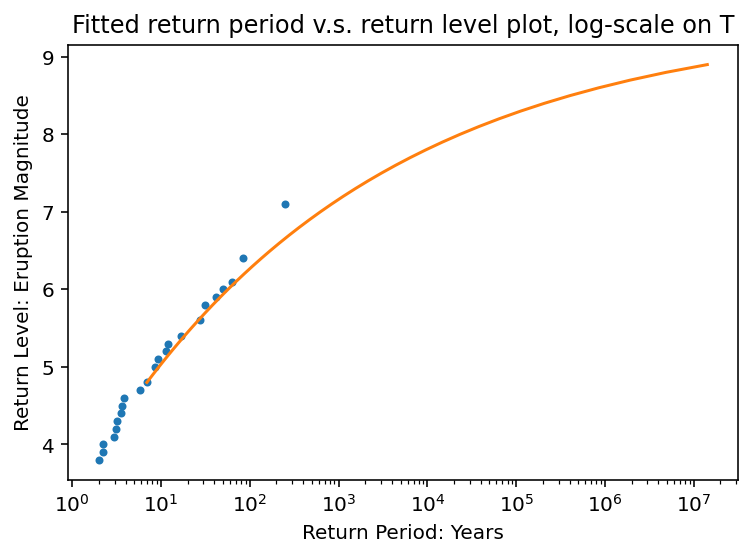

In [ ]:
## Fitted return period v.s. return level plot, log-scale on T
plt.plot(empirical_return_period,empirical_VEI,'.')
plt.plot(return_period_T,return_level_x)
plt.xscale('log',basex = 10)
plt.xlabel('Return Period: Years')
plt.ylabel('Return Level: Eruption Magnitude')
plt.title('Fitted return period v.s. return level plot, log-scale on T')

In [ ]:
xi

-0.13944327973122062

In [ ]:
return_period_T[np.abs(return_level_x-8)<0.05]

array([23294.50745552])

Therefore, it will take on average ~23,000 years for one > M8 volcano eruption occurence. 

**Exercise**: Here we just test for one threhold $u = 4.7$. Can you explore the effect of $u$ for this volcano dataset? Think about the bias-variance trade off we learned in last notebook.

In [ ]:
u_list = np.round(np.arange(4,5.2, 0.05),3)
xi_list = np.zeros(len(u_list))
return_level_list = {}
return_period_list = {}
for i, u in enumerate(u_list):
    xi, mu, sigma = genpareto.fit(volcano_data['M'][volcano_data['M']>u]-u)
    xi_list[i] = xi
    return_level_list[i], return_period_list[i] = return_period_function(np.arange(u+0.1, 9,0.1), u, xi, mu, sigma, 
                                                                         volcano_data['M'], time_interval = 250)

Text(0.5, 0, 'Threshold u')

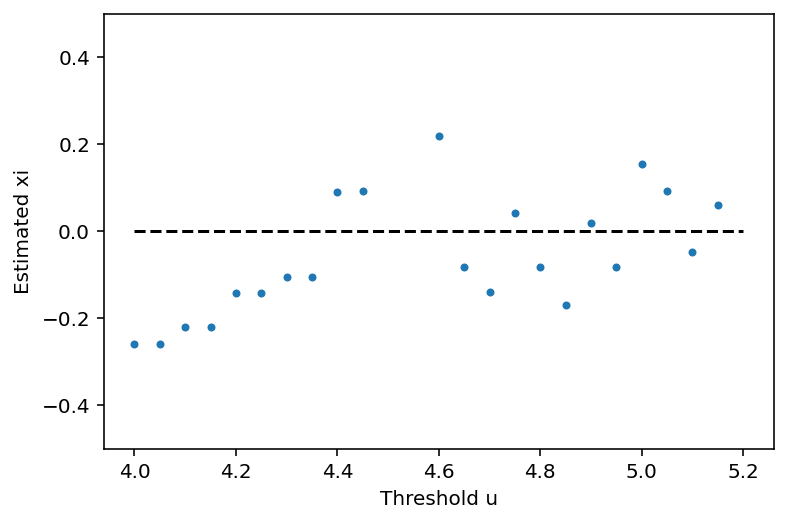

In [ ]:
plt.plot(u_list,xi_list,'.')
plt.hlines(y = 0, xmin = 4, xmax = 5.2, linestyles = 'dashed')
plt.ylim(-0.5,0.5)
plt.ylabel('Estimated xi')
plt.xlabel('Threshold u')

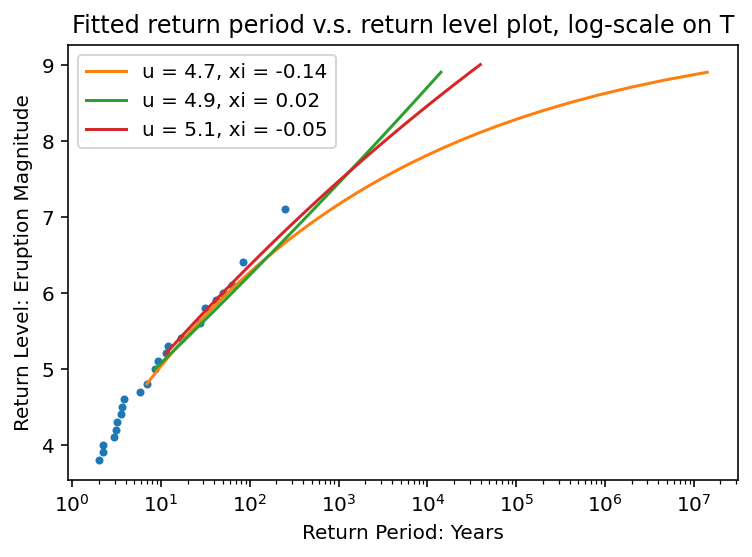

In [ ]:
## Fitted return period v.s. return level plot, log-scale on T
plt.plot(empirical_return_period,empirical_VEI,'.')
u = 4.7
idx = np.where(u_list==u)[0][0]
plt.plot(return_period_list[idx],return_level_list[idx], 
         label = 'u = '+str(u)+', xi = '+str(np.round(xi_list[idx],2)))

u = 4.9
idx = np.where(u_list==u)[0][0]
plt.plot(return_period_list[idx],return_level_list[idx], 
         label = 'u = '+str(u)+', xi = '+str(np.round(xi_list[idx],2)))

u = 5.1
idx = np.where(u_list==u)[0][0]
plt.plot(return_period_list[idx],return_level_list[idx], 
         label = 'u = '+str(u)+', xi = '+str(np.round(xi_list[idx],2)))

plt.xscale('log',basex = 10)
plt.xlabel('Return Period: Years')
plt.ylabel('Return Level: Eruption Magnitude')
plt.title('Fitted return period v.s. return level plot, log-scale on T')
plt.legend()

Different thresholds $u$ corresponds to different estimated $\xi$. When $\xi \geq 0$, we don't have a upper limit bound of volcano eruption magnitude. Observations from 1750 to 2000 may not be enough to reject hypothesis $\xi = 0$ or $\xi > 0$. 

**Exercise**: What if we have no report on the record of the largest volcano eruption M7.1? How does that change our extrapolation?

Let's remove the extreme M7.1 and fit GPD again.

In [ ]:
from scipy.stats import genpareto
u = 4.7
missing_few_extremes_data = np.sort(volcano_data['M'])[:-1]
xi, mu, sigma =genpareto.fit(missing_few_extremes_data[missing_few_extremes_data>u]-u)

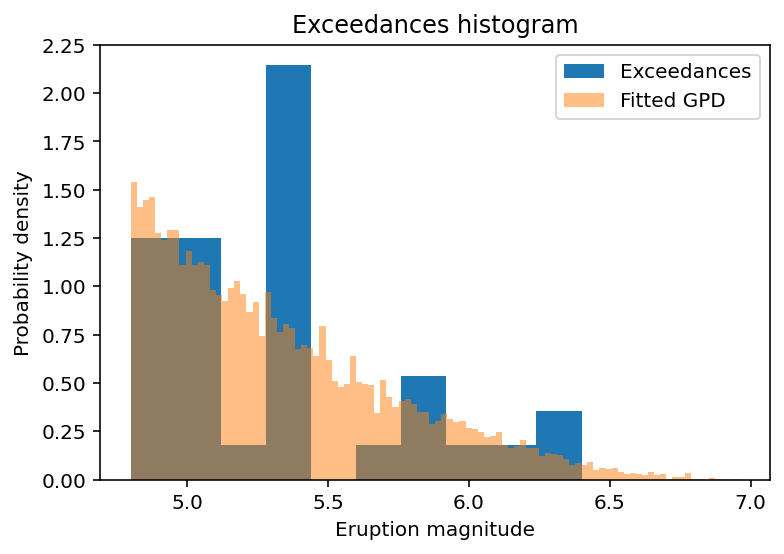

In [ ]:
plt.hist(missing_few_extremes_data[missing_few_extremes_data>u], density  = True, label = 'Exceedances')
plt.hist(genpareto.rvs(xi, mu, sigma, size = 10000)+u, bins = 100, density  = True,alpha = 0.5,label = 'Fitted GPD')
plt.title('Exceedances histogram')
plt.xlabel('Eruption magnitude')
plt.ylabel('Probability density')
plt.legend()

In [ ]:
return_level_x, return_period_T = return_period_function(np.arange(4.8,9,0.1), u, xi, mu, sigma, volcano_data['M'], time_interval = 250)

Text(0.5, 1.0, 'Fitted return period v.s. return level plot, log-scale on T')

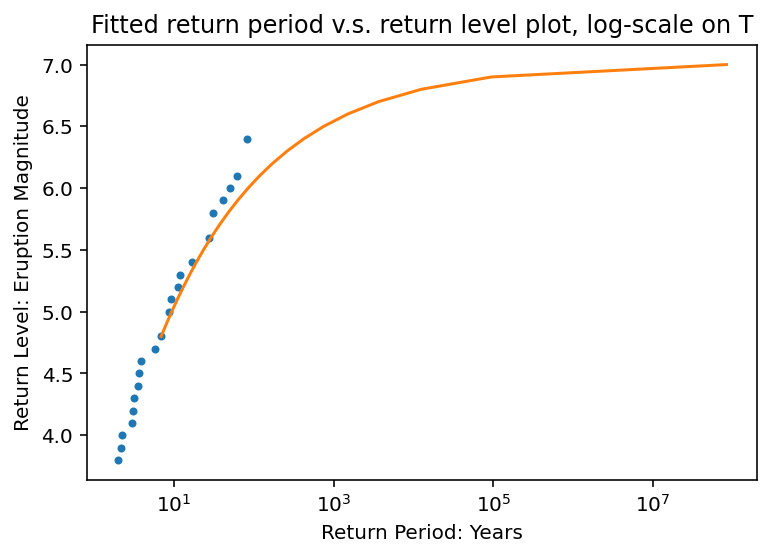

In [ ]:
## Fitted return period v.s. return level plot, log-scale on T
plt.plot(empirical_return_period[:-1],empirical_VEI[:-1],'.')
plt.plot(return_period_T,return_level_x)
plt.xscale('log',basex = 10)
plt.xlabel('Return Period: Years')
plt.ylabel('Return Level: Eruption Magnitude')
plt.title('Fitted return period v.s. return level plot, log-scale on T')

In this case, the possible largest eruption is only M7. The return period with return value larger than M7 is infinity. Therefore, we can see the instability of 1) the empirical estimation and 2) the fitting of return level - return period plot. 

How to have a more robust estimation of return period? Any suggestions?

## Extreme value theory on return level and return period: using Block Maxima

We can also derive similar return level - return period relationship using Method 1, Block Maxima. Sometimes we do have larger datasets: i.e. rainfall. And Block Maxima will be very convenient.

An interesting double log linearity in Block Maxima: 

*   If $\xi = 0$, there is a linear relationship between maxima $x$ and $-\log(-\log (p))$, $p =P(X\leq x) =  1-P(X>x) = 1-\frac{1}{T}$

**Exercise**: Can you do the derivation by yourself? Using GEV distribution? 

Let's explore the **double log linearity** in our volcano dataset. Here we use block size = 10 years, and find the distribution of maxima:

In [ ]:
volcano_data['Year_bins'] = np.array((volcano_data['Year']-1750)/10,dtype = 'int64')
volcano_maxima = [np.max(volcano_data['M'][volcano_data['Year_bins'] == i]) for i in range(np.max(volcano_data['Year_bins']))]

Text(0.5, 1.0, 'Volcano maxima distribution')

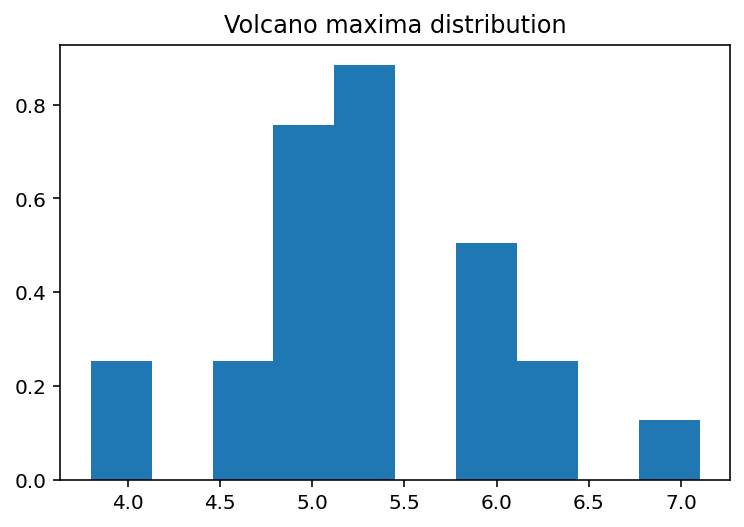

In [ ]:
plt.hist(volcano_maxima,density = True)
plt.title('Volcano maxima distribution')

We can then plot maxima value $x$ and $−\log(−\log(𝑝))$. $p$ in fact is the corresponding quantile of $x$.

In [ ]:
volcano_max_unique = np.unique(np.array(volcano_maxima)) #x
p = np.array([np.mean(volcano_maxima<value) for value in volcano_max_unique]) #p, corresponding quantile

Text(0, 0.5, 'x')

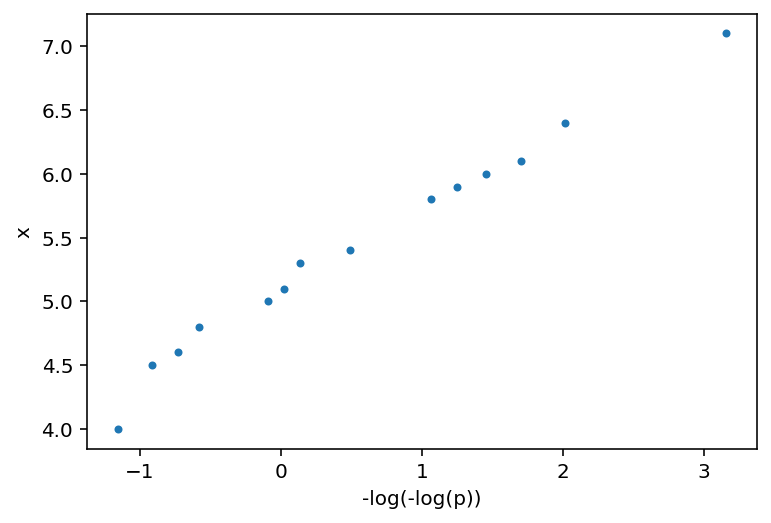

In [ ]:
plt.plot(-np.log(-np.log(p)),volcano_max_unique,'.')
plt.xlabel('-log(-log(p))')
plt.ylabel('x')

If we assume $\xi = 0$, we can then fit a linear regression on the points, extrapolate the linearity to predict $p$, thereby large return periods $T$. 

**Exercise**: Can you explore the impact of block size? What is your reasoning of your block size choice? 

# <font color='green'> [Advanced] Distribution of discrete event: Poisson process model</font>
 <font color='green'> In this section, we will introduce Poisson point process model, and see how this model enable direct estimate of recurrences. 


###  <font color='green'> Discrete event and Poisson process model

<font color='green'> Let's define a **discrete event**, a big volcano eruption. Here big means volcano eruption magnitude > M 5.5. 

<font color='green'> A simple question we would like to ask for this discrete event is:

*  <font color='green'>  **How many big volcano eruptions will occur within the next 100 years?**

<font color='green'> Let's denote the average number of big volcano eruptions within 100 years as $\Lambda(t) = \lambda*t$, $t = 100$, where $\lambda$ is the average number of eruptions occur within a year. $\lambda$ is a small number.

<font color='green'> How does that definition relate to the return period $T$? So $T$ is an average time interval between events. Then $T$ is the reciprocal of $\lambda$, $T = 1/\lambda$. 



<font color='green'> Now we visualize the "big volcano eruption" from 1750 to 2000. 

Text(0, 0.5, 'Eruption Magnitude')

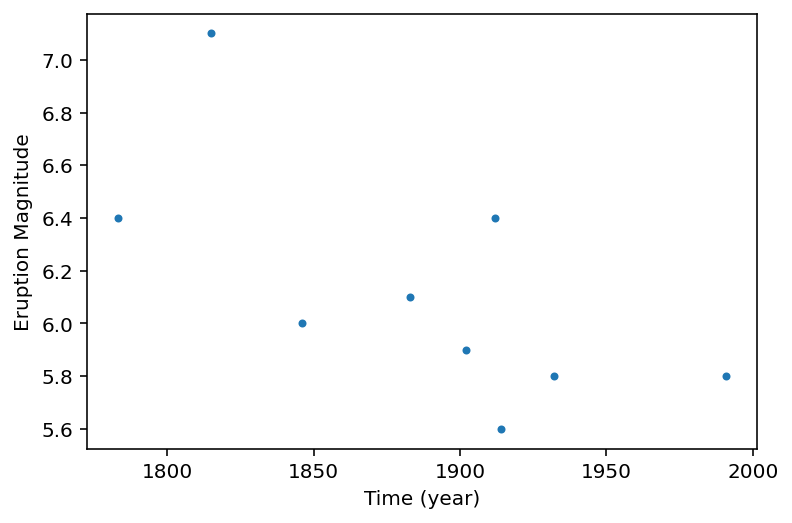

In [ ]:
plt.plot(volcano_data['Year'][volcano_data['M']>5.5], volcano_data['M'][volcano_data['M']>5.5],'.')
plt.xlabel('Time (year)')
plt.ylabel('Eruption Magnitude')

<font color='green'> We are only interested in big eruptions, not the exact magnitude. We can just plot our discrete events on the time scale: 

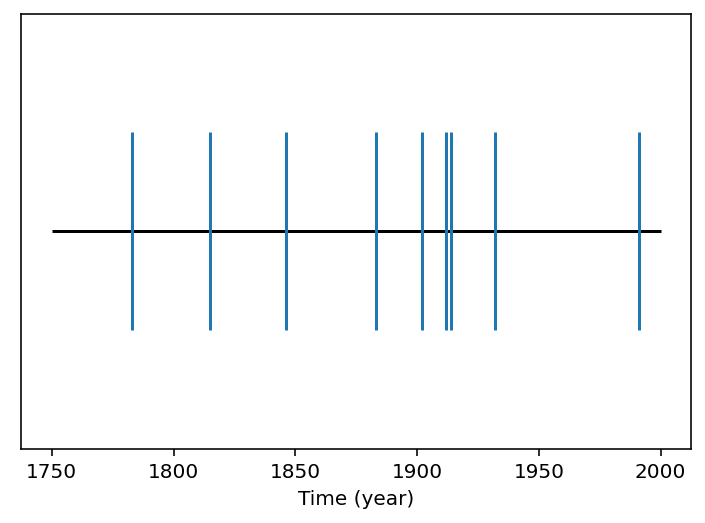

In [ ]:
plt.figure()
a = volcano_data['Year'][volcano_data['M']>5.5]
plt.hlines(y = 0,xmin = 1750,xmax = 2000)  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal',lineoffsets=0)
plt.xlabel('Time (year)')
plt.yticks([])
plt.show()

<font color='green'> If no event will influence any other event, which means no big eruption will influence any other eruption:

<font color='green'> then the probability of $X = k$ discrete events happens within $t$ time is:
$$P(X = k) = \frac{\Lambda(t)^k}{k!}\exp(-\Lambda(t)) = \frac{(\lambda t)^k}{k!}\exp(-(\lambda t))$$

<font color='green'> $\lambda$ is a shape parameter. 

<font color='green'> Then the average/expectation of $X$ is 
$$E(X) = \Lambda(t) = \lambda t$$

<font color='green'> $\lambda$ is also called the intensity parameter: how many events occur with in unit time. 

<font color='green'> A random variable $X$ following the above probability density function has the **Poisson distribution**. 

<font color='green'> **Poisson point process** is a type of random mathematical object (big volcano eruption) that consists of points randomly located on a mathematical space (time scale). 

<font color='green'> So in order to estimate $\lambda$, we can estimate the empirical intensity: $\bar{\lambda}$ =  9 events/250 years = 3.6%

<font color='green'> And the intensity $\Lambda(t)$ with any interval of length $t$ is $\Lambda(t) = \lambda t = 3.6\% * t$

<font color='green'> So the intensity $\lambda$ can be treated similar as the return period $T$, both indicate frequency of extremes. 

### <font color='green'> Sample from Poisson process model
<font color='green'> Let's say we want to make predictions on big eruptions in the future. 

<font color='green'> So from extreme value theory, we learn the estimate return period for these big eruptions: T = 250 years/9 events = 28 years. That's an average from historical data. 

<font color='green'> Can we use Poisson process model to sample the future events? Stochastically? 

In [ ]:
np.random.seed(1234)
s1 = np.random.poisson(lam = 9/250, size = 200)
s2 = np.random.poisson(lam = 9/250, size = 200)

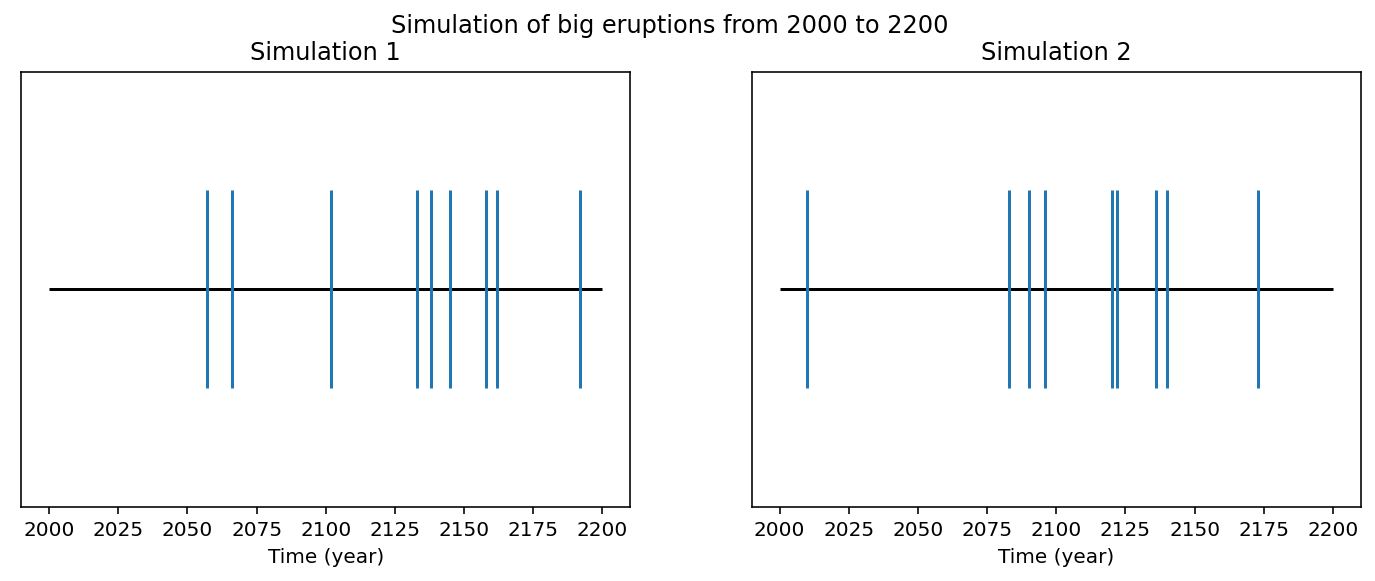

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,4))
fig.suptitle('Simulation of big eruptions from 2000 to 2200')

ax1.hlines(y = 0,xmin = 2000,xmax = 2200)  # Draw a horizontal line
ax1.eventplot(np.arange(2000,2200)[s1==1], orientation='horizontal',lineoffsets=0)
ax1.set_xlabel('Time (year)')
ax1.set_yticks([])
ax1.set_title('Simulation 1')

ax2.hlines(y = 0,xmin = 2000,xmax = 2200)  # Draw a horizontal line
ax2.eventplot(np.arange(2000,2200)[s2==1], orientation='horizontal',lineoffsets=0)
ax2.set_xlabel('Time (year)')
ax2.set_yticks([])
ax2.set_title('Simulation 2')


plt.show()

<font color='green'> Here we sample two sets of the future events from Poisson process model. 

<font color='green'> We may conjecture if we wait for long and there is no eruption, it will be more likely to have eruptions in near future. THAT'S NOT TRUE for Poisson process model. In fact, there is memoryless property for possion process: the existence of one event existing in a finite interval does not affect the probability of other events existing. 

<font color='green'> Also, the interval between any two consecutive points will be exponential distributed $f_X(x;\lambda) = \lambda e^{-\lambda x}$. 

### <font color='green'> Relationship between Poisson process and extreme value statistics

<font color='green'> In the previous part, we define the discrete event as a big volcano eruption, > M5.5. And we don't specifically focus on the exact level of magnitude, as long as its > M5.5. 

<font color='green'> So how about $\lambda$ for other big event, > M6? Or for some unseen event, > M8? Here we can link $\lambda$ to our extreme value statistics. 

<font color='green'> In theory, if we denote our threhold as $u$, then $\lambda$ now is also a function of $u$, $\lambda(u)$. 

<font color='green'> $$\lambda(u) = \left( 1+\xi\frac{(u-\mu)}{\sigma} \right)^{-\frac{1}{\xi}}$$

<font color='green'> which is quite similar to GPD distribution we learnt earlier. In fact, this discrete event is defined on the big exceedances (> M 5.5, u = 5.5). 

<font color='green'> $\lambda (u)$ now is just intensity for unit time interval, given threshold $u$. 

<font color='green'> To generalize to any time interval with length $t$, we can think $\lambda(u,t)$ is a intensity for two dimensional mathematical space: time $T$, threshold $u$:

Text(0, 0.5, 'u')

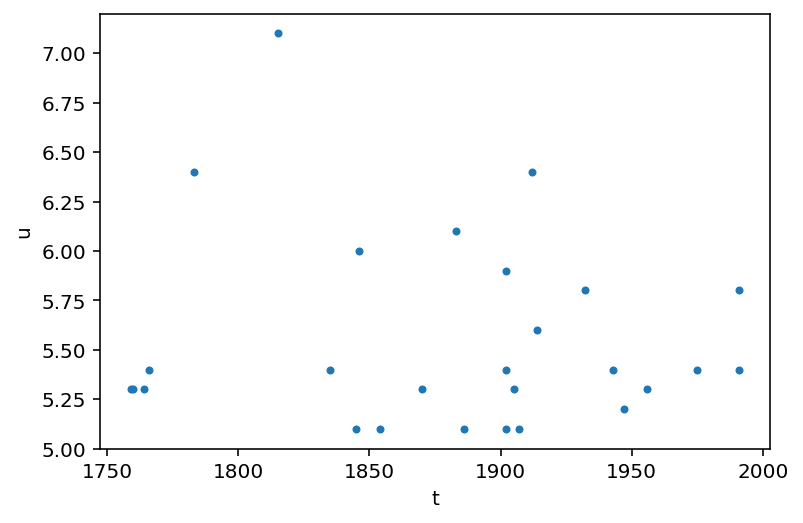

In [ ]:
plt.plot(volcano_data['Year'][volcano_data['M']>5], volcano_data['M'][volcano_data['M']>5],'.')
plt.xlabel('t')
plt.ylabel('u')

<font color='green'> So along $T$, the intensity $\lambda (u,t)$ is homogenuous, along $u$ the intensity $\lambda (u,t)$ is non-homogenuous: more dense for lower $u$. 

<font color='green'> Therefore, we can calculate the intensity for any $u$ interval and any $t$ interval. 

<font color='green'> $\Lambda(u_1, u_2, t_1, t_2) = \int_{u_1}^{u_2}\int_{t_1}^{t_2}\lambda (u,t) = (t_2-t_1)\int_{u_1}^{u_2}\left( 1+\xi\frac{(u-\mu)}{\sigma} \right)^{-\frac{1}{\xi}}$

<font color='green'> And fit $\Lambda(u_1, u_2, t_1, t_2)$ to estimate $\xi,\mu, \sigma$. Similar to POT. 

# Summary

We add time feature to extreme value datasets, and introduce return period and return level concepts, which is useful for risk analysis on natural disasters. We illustrate how to fit a extreme value dataset and extrapolate return period v.s. return level plot. 

Then we introduce the distribution of discrete event: Poisson process mode, and show it is more convenient for extreme datasets with time feature. 

Are you interested in the return period of any natural event? Earthquakes? Rainfall? Flood? Landslides? Please use this notebook as a reference and address scientific questions you are interested in.  

